## Introducción

El presente trabajo tiene como objetivo analizar el comportamiento de clientes de una empresa de marketing, a partir de un conjunto de datos históricos, con el fin de identificar patrones de consumo y predecir la probabilidad de que un cliente responda positivamente a una campaña de marketing.

Este tipo de análisis resulta relevante para optimizar la segmentación de clientes, mejorar la efectividad de las campañas y reducir costos operativos.


# Sección nueva

### 1. Importación de Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Carga Inicial de Datos

In [ ]:
#elijo nombre para el dataset

info = pd.read_csv('marketing_campaign.xls', sep='\t')

### 3. Previsualización y Análisis Inicial del DataFrame

In [ ]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#hago una previsualizacion de la informacion
info

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Revision de datos nulos dentro del dataset

info.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
info.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


### 4. Definición y Eliminación de Columnas Irrelevantes

In [ ]:
irrelevant_columns = ['ID', 'Marital_Status', 'Z_CostContact', 'Z_Revenue']

In [ ]:
info_filtered = info.drop(columns=irrelevant_columns)

### 5. Eliminación de Filas Duplicadas

In [ ]:
# Eliminar filas duplicadas
info = info.drop_duplicates()

# Verificar la cantidad de filas después de la eliminación de duplicados
print(f"Número de filas después de eliminar duplicados: {len(info)}")

# Mostrar las primeras filas del DataFrame actualizado
info.head()

Número de filas después de eliminar duplicados: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print('--- Missing Values ---')
print(info.isnull().sum())

print('\n--- Duplicate Rows ---')
print(f'Total duplicate rows: {info.duplicated().sum()}')

print('\n--- Data Types ---')
print(info.dtypes)

print('\n--- General Statistics ---')
display(info.describe(include='all'))

--- Missing Values ---
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

--- Duplicate Rows ---
Total duplicate rows: 0

--- Data Types ---
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income            

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


### 6. Verificación de Calidad de Datos (Actualizado)

In [ ]:
info_filtered.to_csv('Marketing_campaign_clean', index=False)

In [ ]:
info=pd.read_csv("/content/Marketing_campaign_clean")

In [ ]:
info.duplicated().sum()

np.int64(186)

### 7. Análisis de Gasto por Edad y Visualización (Barra Horizontal)

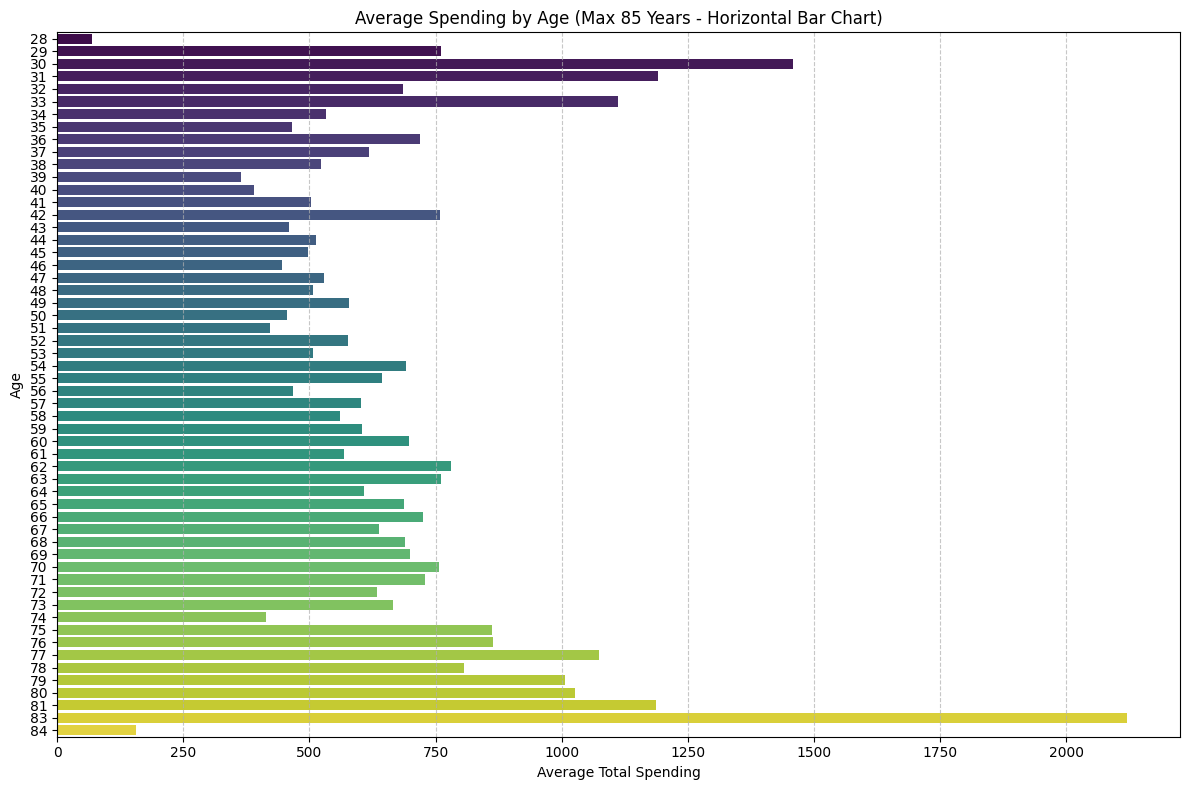

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the original file to ensure 'Year_Birth' is present for age calculation.
# This bypasses any intermediate cleaning steps that removed 'Year_Birth'.
original_info = pd.read_csv('marketing_campaign.xls', sep='\t')

# Calculate Age based on the original data
original_info['Age'] = 2024 - original_info['Year_Birth']

# Calculate total spending for the original_info
original_info['Total_Spending'] = original_info['MntWines'] + original_info['MntFruits'] + original_info['MntMeatProducts'] + \
                                  original_info['MntFishProducts'] + original_info['MntSweetProducts'] + original_info['MntGoldProds']

# Now, apply the age limit and proceed with the plotting using original_info
info_for_plot = original_info[original_info['Age'] <= 85].copy()

# Group by Age and calculate mean spending again with the filtered data
age_spending = info_for_plot.groupby('Age')['Total_Spending'].mean().reset_index()

# Sort by Age for better visualization
age_spending = age_spending.sort_values(by='Age')

# Create a horizontal bar plot with the updated data
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Spending', y='Age', data=age_spending, orient='h', hue='Age', palette='viridis', legend=False)
plt.title('Average Spending by Age (Max 85 Years - Horizontal Bar Chart)')
plt.xlabel('Average Total Spending')
plt.ylabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El análisis del gasto promedio por grupo etario permite identificar diferencias en el comportamiento de consumo según la edad. Se observa que determinados rangos presentan un mayor nivel de gasto, lo cual sugiere que la edad podría estar relacionada con el poder adquisitivo o con patrones de consumo específicos. Este resultado justifica la inclusión de la variable edad como posible característica relevante para el modelo predictivo.

### 8. Visualización de Distribución de Variables Numéricas (Boxplots)

In [ ]:
info.head(5)

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
info.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


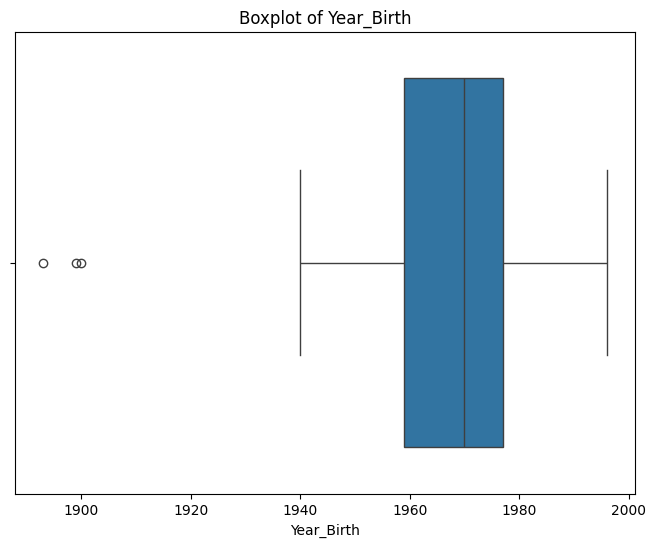

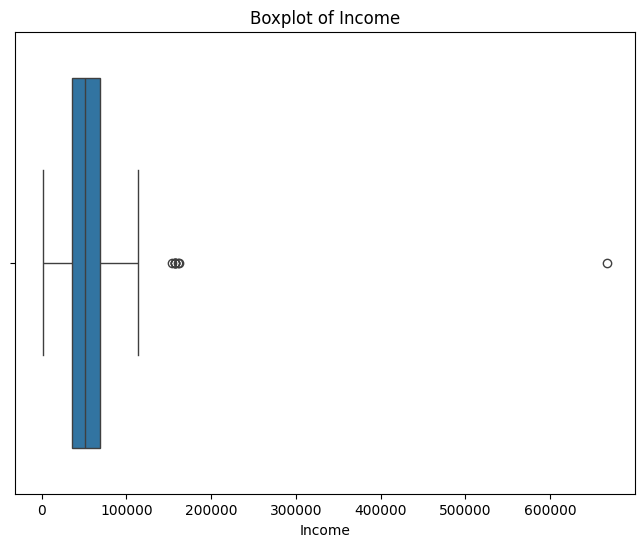

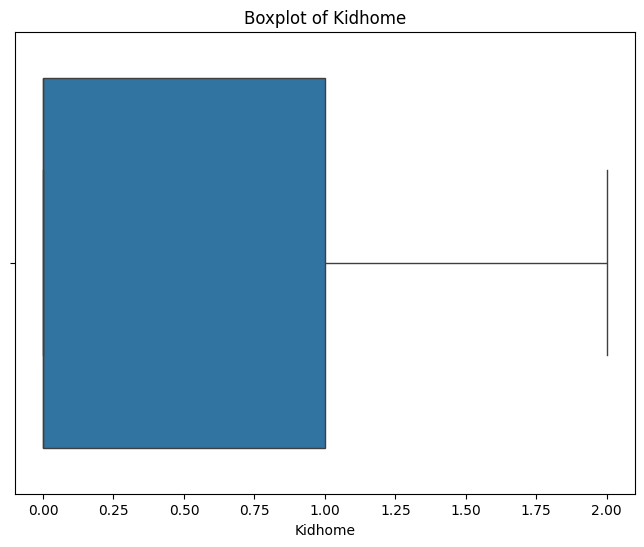

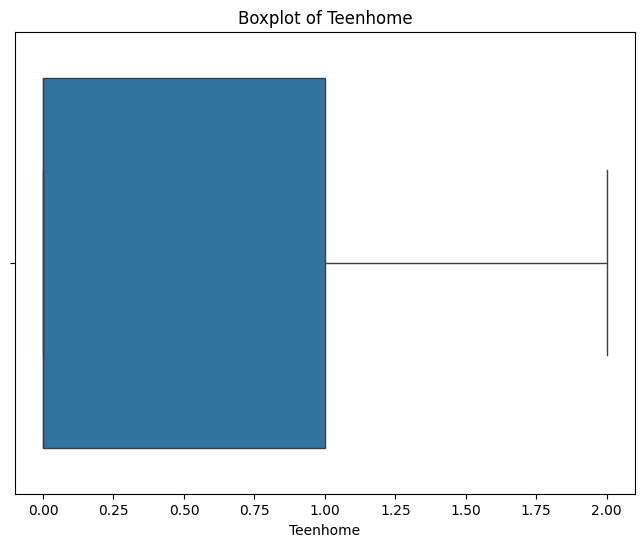

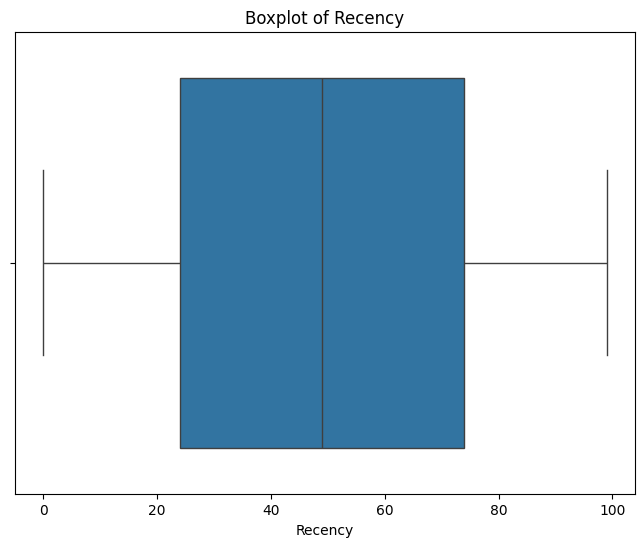

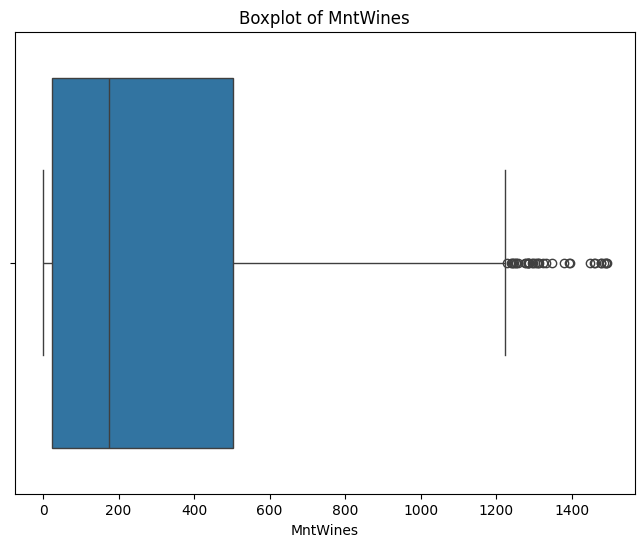

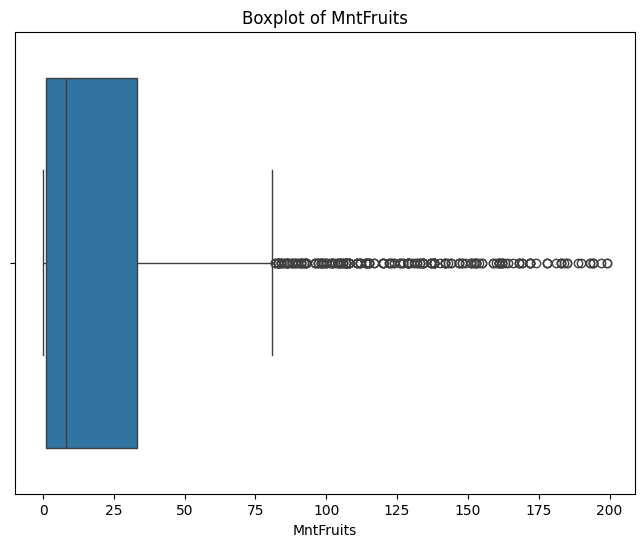

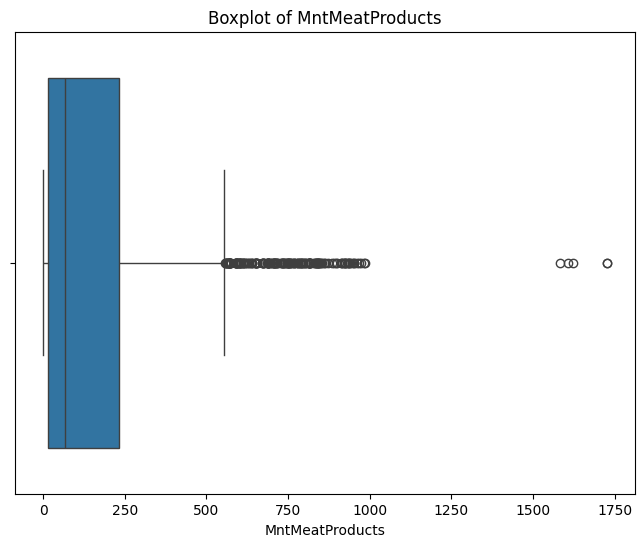

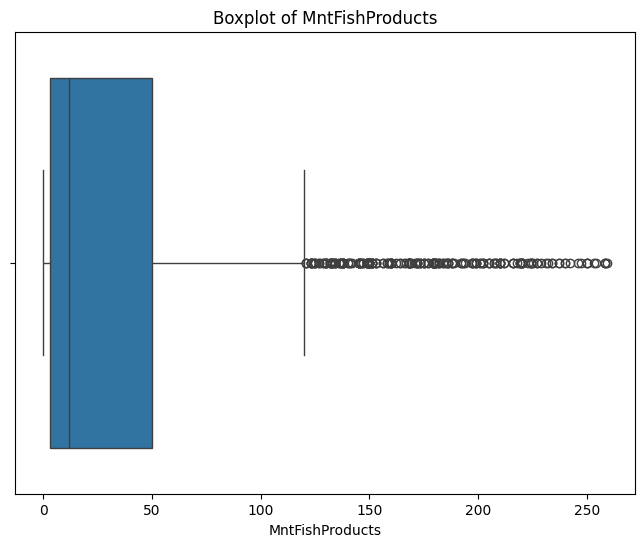

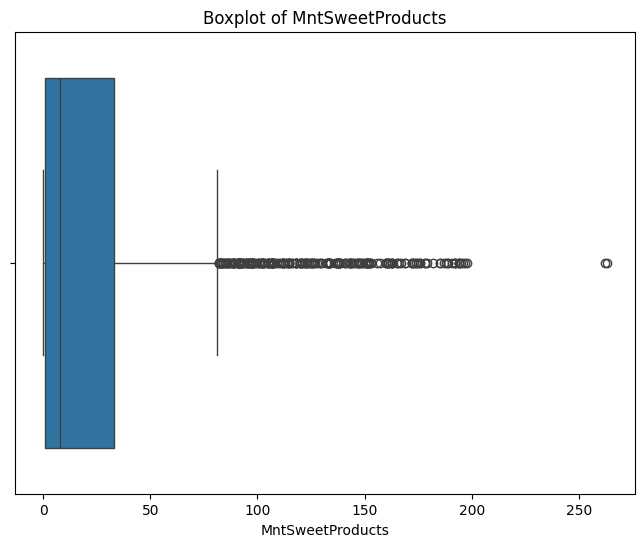

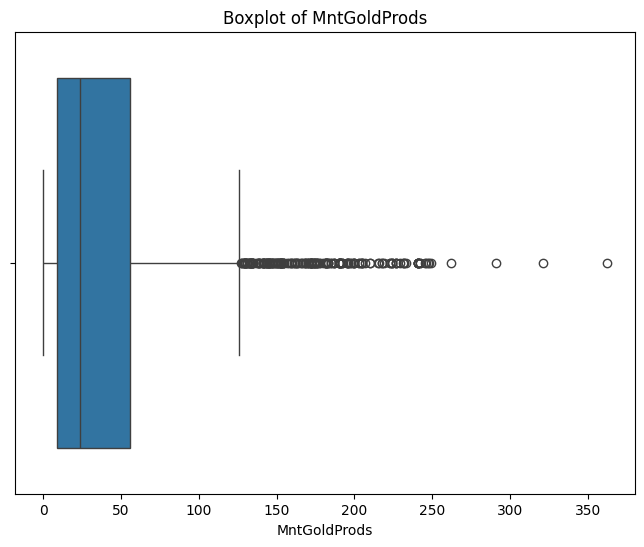

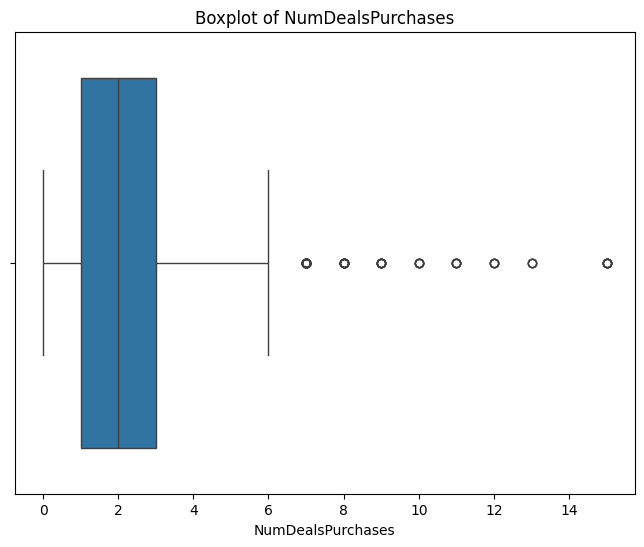

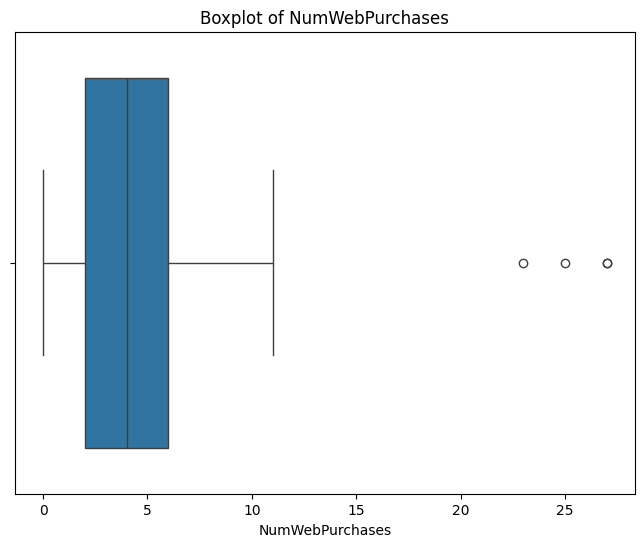

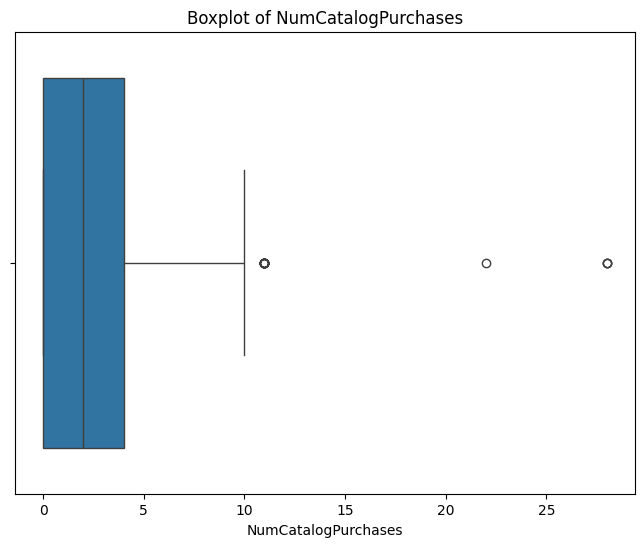

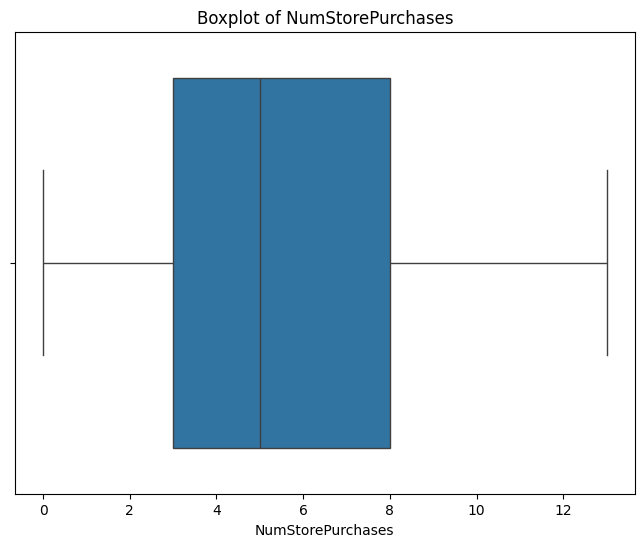

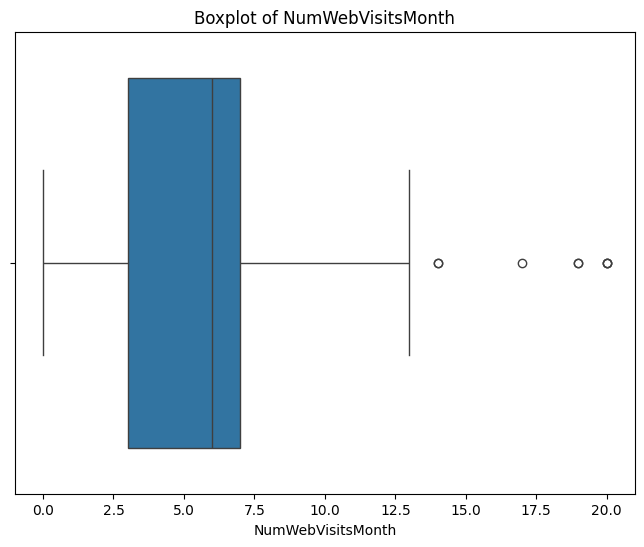

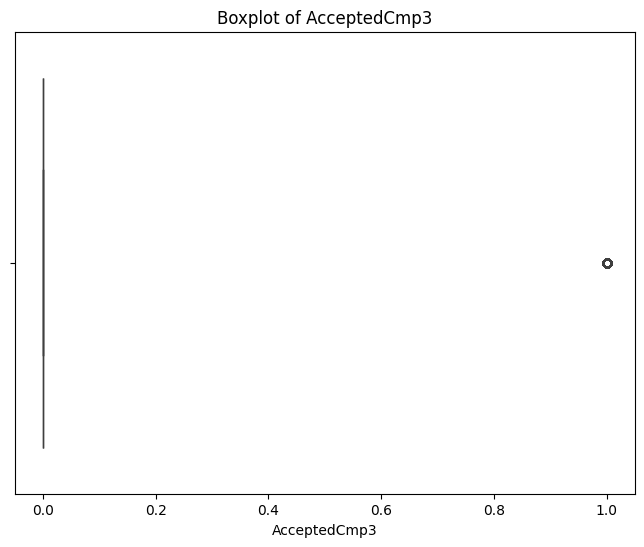

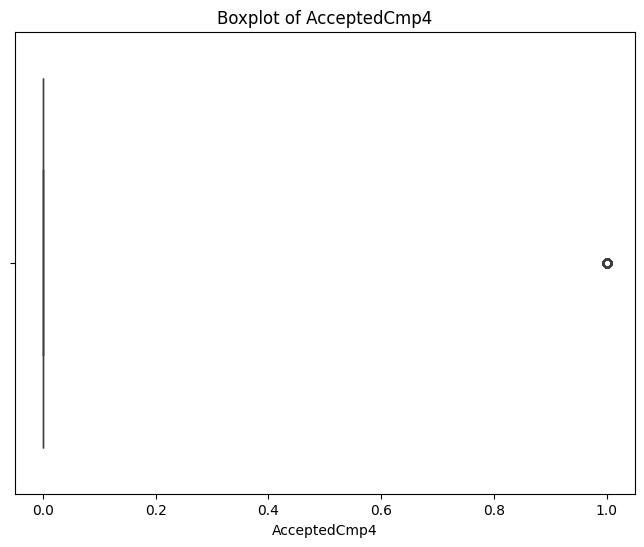

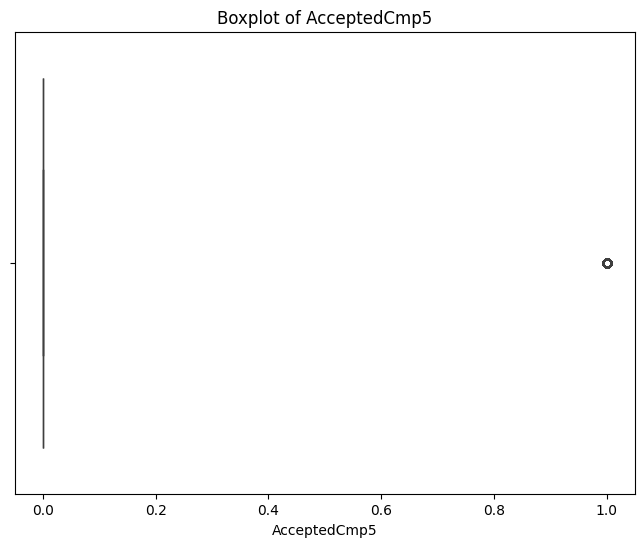

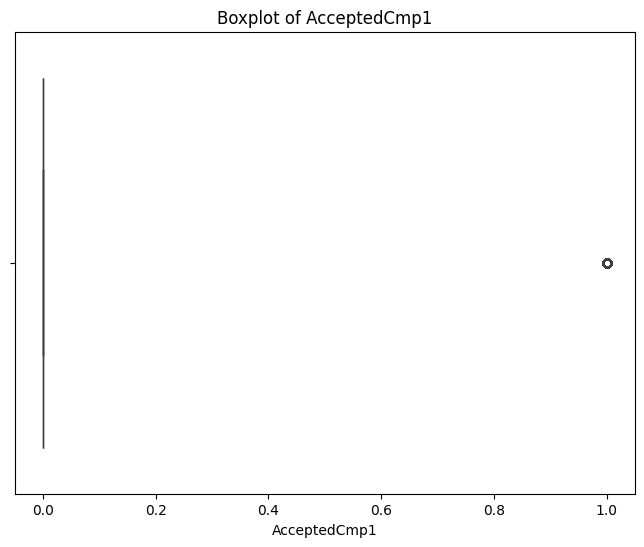

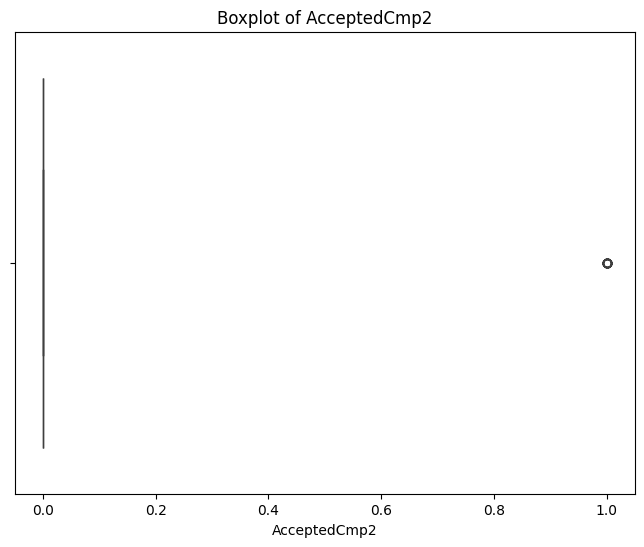

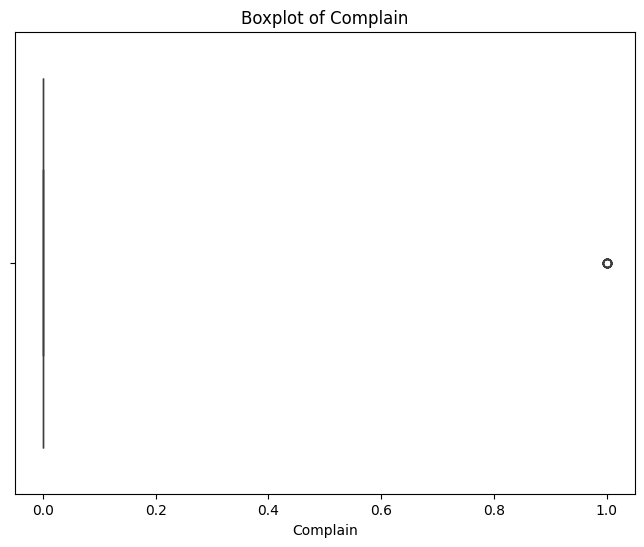

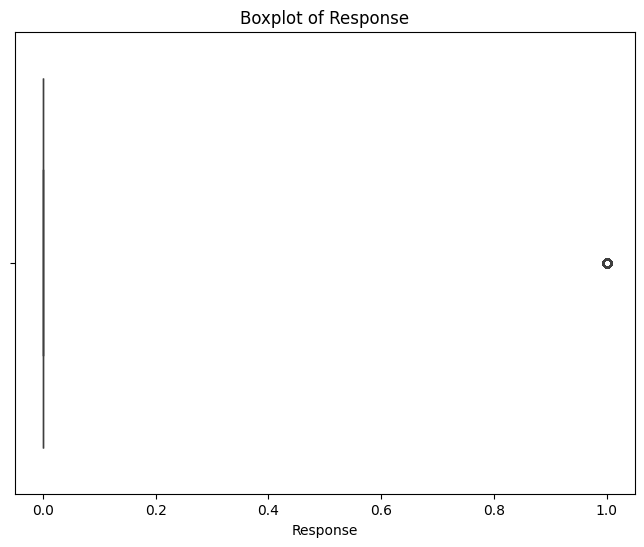

In [ ]:
numerical_cols =info.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=info[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Los boxplots permiten analizar la distribución de las principales variables numéricas del dataset, así como identificar la presencia de valores atípicos. Se observa una dispersión considerable en variables como ingresos y gasto total, lo cual indica heterogeneidad en el comportamiento de los clientes. Estos resultados refuerzan la necesidad de aplicar técnicas de limpieza y escalado antes del entrenamiento del modelo.

### 9. Distribución de Niveles Educativos

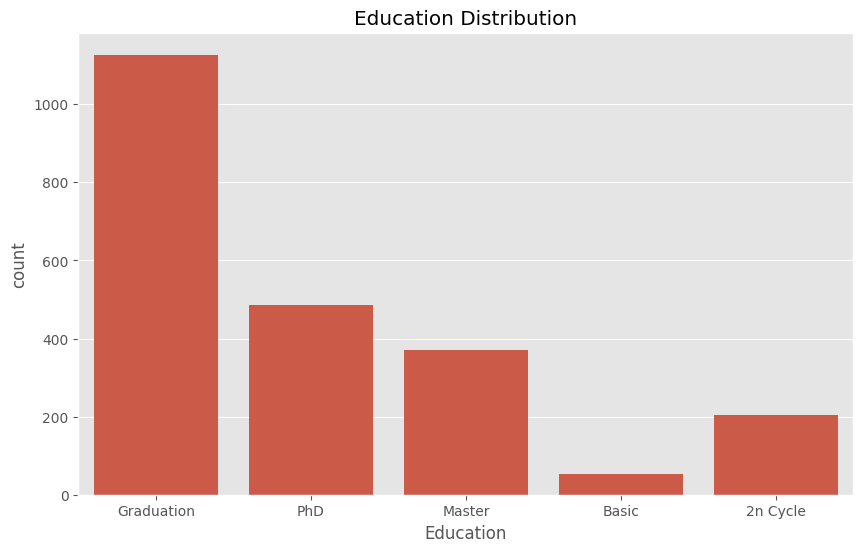

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

sns.countplot(x='Education', data=info)
plt.title('Education Distribution')
plt.show()

El gráfico presenta la distribución de los clientes según su nivel educativo. Se observa que ciertos niveles concentran la mayor proporción de la muestra, lo cual aporta contexto sociodemográfico al análisis. Esta variable podría influir indirectamente en el comportamiento de consumo y en la respuesta a campañas de marketing, por lo que se considera relevante para el análisis exploratorio.

### 10. Análisis Comparativo por Respuesta a Campaña

Analisis de Datos

In [ ]:
from pandas.core.arrays import numeric
plt.style.use('ggplot')
colors = ['#1f77b4','#d62728']

numeric_features = ['income', 'education', 'Year_Birth', 'Total_Spending', 'Recency', 'Kidhome', 'Teenhome', 'MntWines']

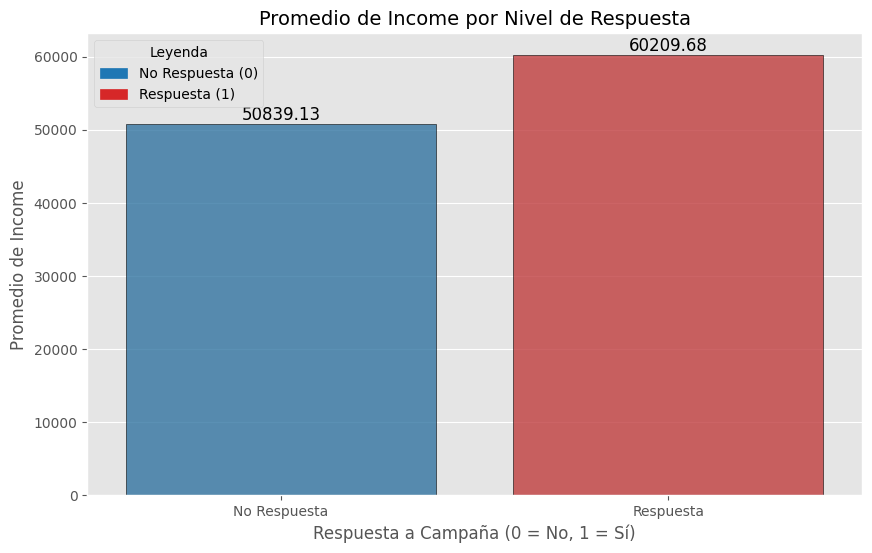

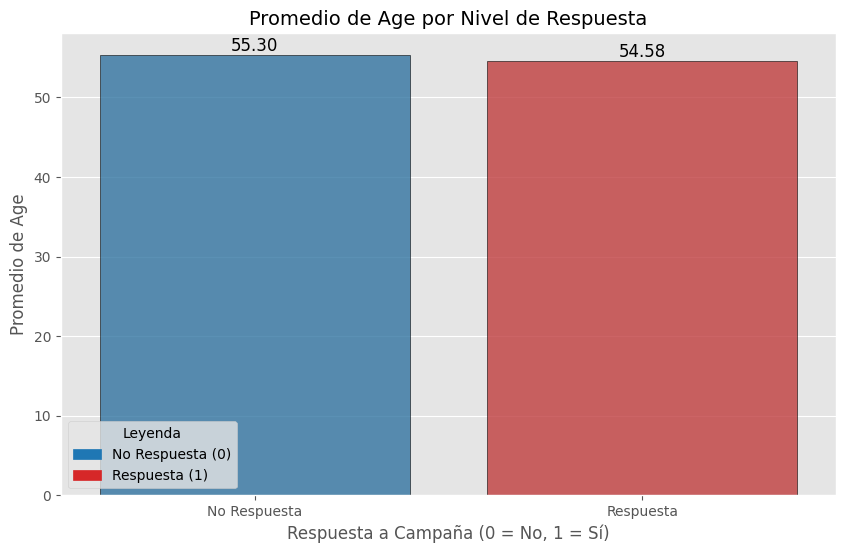

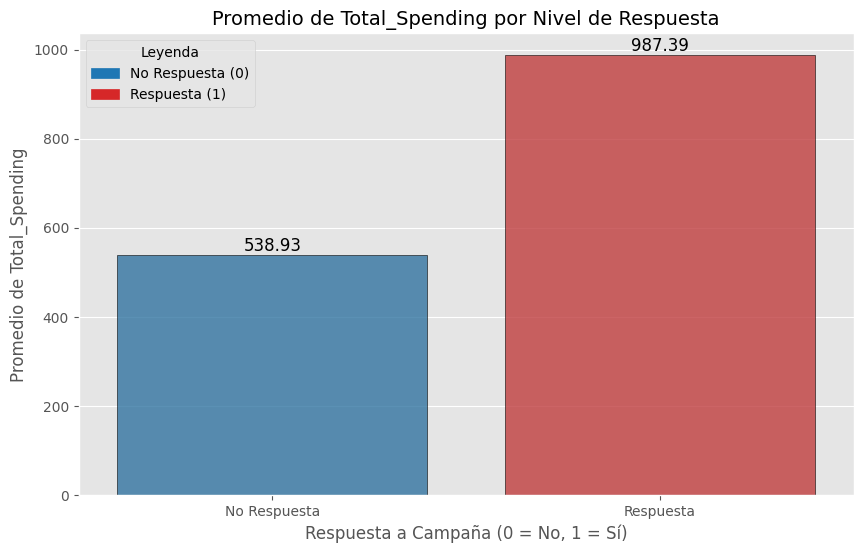

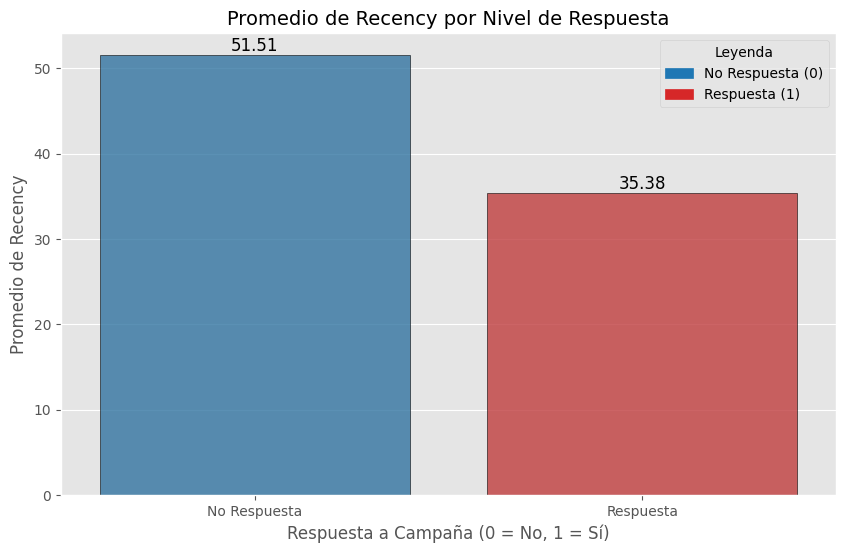

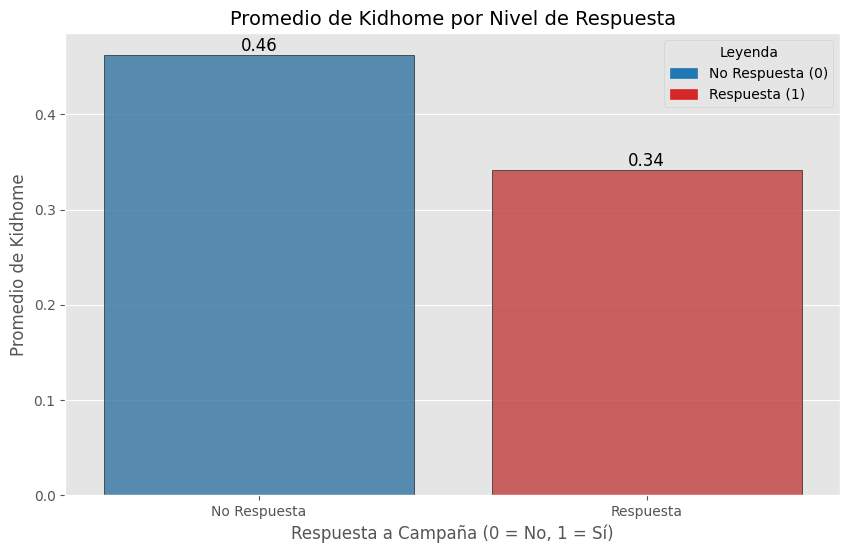

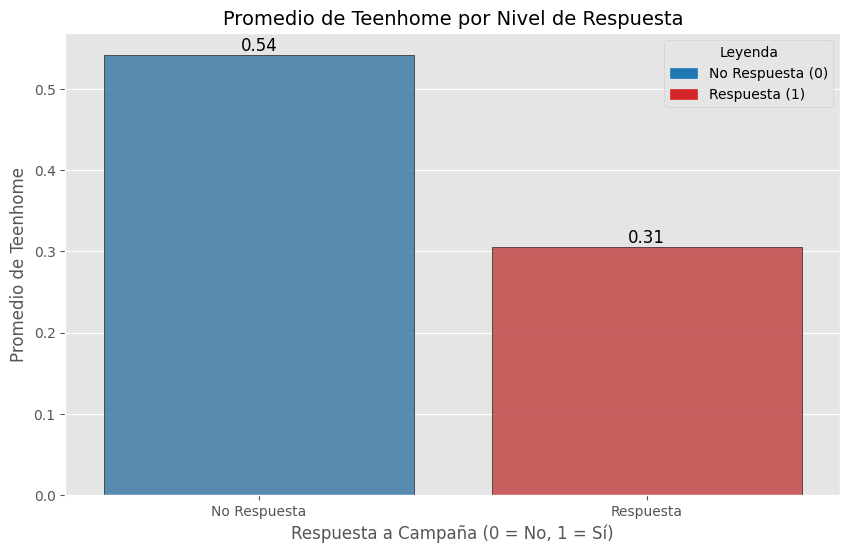

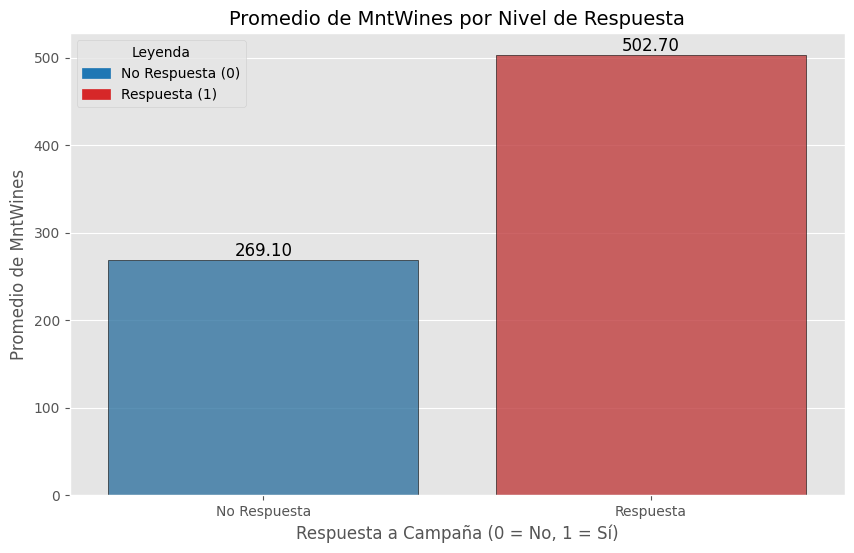

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
colors = ['#1f77b4','#d62728'] # Define colors if not already defined

# Calculate Age and Total_Spending on the info DataFrame
info['Age'] = 2024 - info['Year_Birth']
info['Total_Spending'] = info['MntWines'] + info['MntFruits'] + info['MntMeatProducts'] + \
                         info['MntFishProducts'] + info['MntSweetProducts'] + info['MntGoldProds']

# Select relevant numerical features from the 'info' DataFrame
selected_numeric_features = [
    'Income',
    'Age',
    'Total_Spending',
    'Recency',
    'Kidhome',
    'Teenhome',
    'MntWines'
]

# Create comparative bar charts for each selected feature
for feature in selected_numeric_features:
    plt.figure(figsize=(10, 6))

    # Calculate the mean for each group ('Response' 0 and 1)
    grouped_data = info.groupby('Response')[feature].mean().reset_index()

    # Bar plot
    sns.barplot(
        x='Response',
        y=feature,
        data=grouped_data,
        palette=colors,
        edgecolor='black',
        alpha=0.8,
        hue='Response',
        legend=False
    )

    # Customization
    plt.title(f'Promedio de {feature} por Nivel de Respuesta', fontsize=14)
    plt.xlabel('Respuesta a Campaña (0 = No, 1 = Sí)', fontsize=12)
    plt.ylabel(f'Promedio de {feature}', fontsize=12)
    plt.xticks([0, 1], ['No Respuesta', 'Respuesta'])

    # Custom legend
    legend_labels = ['No Respuesta (0)', 'Respuesta (1)']
    patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(2)]
    plt.legend(patches, legend_labels, title='Leyenda')

    # Add exact values on top of the bars
    for index, row in grouped_data.iterrows():
        plt.text(
            index,
            row[feature],
            f'{row[feature]:.2f}',
            ha='center',
            va='bottom',
            fontsize=12
        )

    plt.show()

Al comparar las características de los clientes que respondieron positivamente a la campaña con aquellos que no lo hicieron, se observan diferencias en variables como ingresos y gasto total. En general, los clientes que respondieron tienden a presentar valores más elevados en estas variables, lo cual sugiere que existe una relación entre el nivel de consumo y la probabilidad de respuesta a campañas de marketing.

### 11.Modelo de Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd # Ensure pandas is imported

# --- Preprocessing steps to ensure data is ready ---
# Handle missing values in Income
info['Income'].fillna(info['Income'].mean(), inplace=True)

# Variable objetivo
y = info['Response']

# Variables predictoras
X = info[[
    "Income",
    "Age",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumWebPurchases",
    "NumStorePurchases",
    "NumCatalogPurchases",
    "Total_Spending"
]]

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       381
           1       0.68      0.25      0.37        67

    accuracy                           0.87       448
   macro avg       0.78      0.62      0.65       448
weighted avg       0.85      0.87      0.84       448

[[373   8]
 [ 50  17]]


/tmp/ipython-input-4108466578.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  info['Income'].fillna(info['Income'].mean(), inplace=True)


In [ ]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

coef_df


,Variable,Coeficiente
8,Total_Spending,0.994599
5,NumWebPurchases,0.307634
2,Kidhome,0.247443
7,NumCatalogPurchases,0.236255
1,Age,0.012648
0,Income,-0.270504
3,Teenhome,-0.349230
6,NumStorePurchases,-0.606706
4,Recency,-0.703416


Al comparar las características de los clientes que respondieron positivamente a la campaña con aquellos que no lo hicieron, se observan diferencias en variables como ingresos y gasto total. En general, los clientes que respondieron tienden a presentar valores más elevados en estas variables, lo cual sugiere que existe una relación entre el nivel de consumo y la probabilidad de respuesta a campañas de marketing.

/tmp/ipython-input-3480878265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


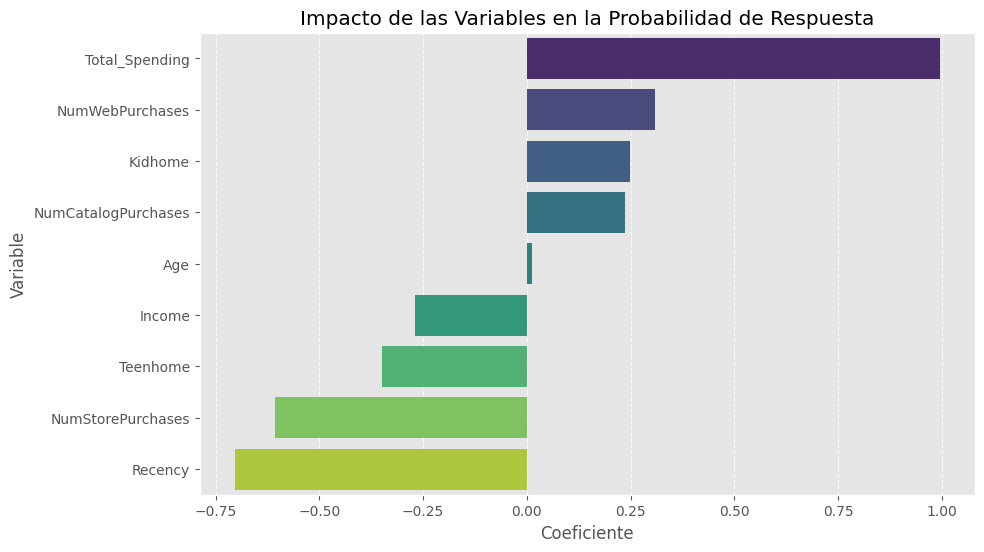

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coeficiente',
    y='Variable',
    data=coef_df,
    palette='viridis'
)
plt.title('Impacto de las Variables en la Probabilidad de Respuesta')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


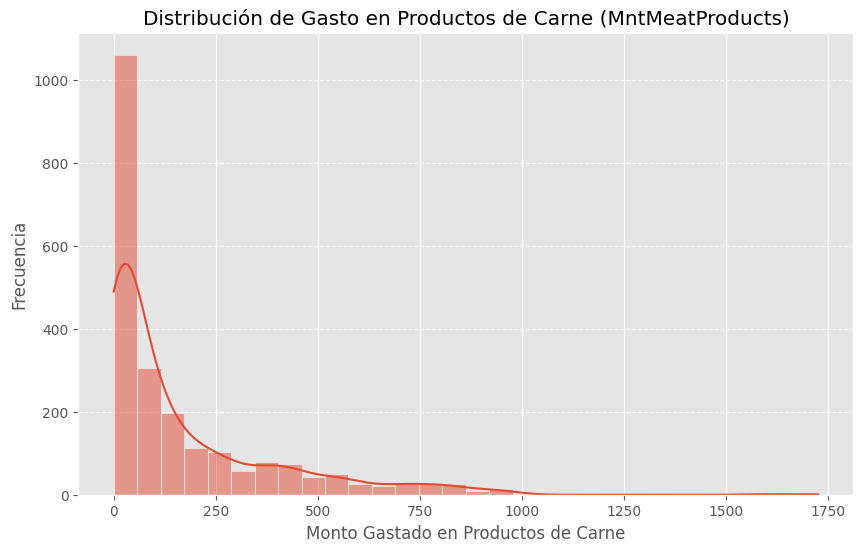

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(info['MntMeatProducts'], bins=30, kde=True)
plt.title('Distribución de Gasto en Productos de Carne (MntMeatProducts)')
plt.xlabel('Monto Gastado en Productos de Carne')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se entrenó un modelo de regresión logística con el objetivo de predecir la probabilidad de respuesta de los clientes a campañas de marketing. Los resultados indican que variables relacionadas con el nivel de ingresos, el gasto total y los canales de compra tienen un impacto significativo en la probabilidad de respuesta. El modelo permite identificar perfiles de clientes con mayor propensión a responder positivamente, lo cual puede ser utilizado para optimizar la segmentación y mejorar la efectividad de futuras campañas.

La regresión logística se utiliza por tratarse de un problema de clasificación binaria

# Conclusión

En este trabajo se realizó un análisis exploratorio y predictivo sobre un conjunto de datos de marketing, con el objetivo de identificar patrones de comportamiento de los clientes y predecir su probabilidad de respuesta a campañas comerciales.

A partir del análisis exploratorio, se observó que variables como el nivel de ingresos, el gasto total y la frecuencia de compra presentan diferencias relevantes entre los clientes que responden positivamente a las campañas y aquellos que no lo hacen.

El modelo de regresión logística permitió confirmar estas relaciones, destacando el impacto de variables económicas y de comportamiento de compra en la probabilidad de respuesta. Si bien el modelo presenta un desempeño adecuado para el objetivo planteado, existen limitaciones asociadas al desbalance de clases y a la simplicidad del modelo, que podrían abordarse en trabajos futuros mediante técnicas más avanzadas o la incorporación de nuevas variables.

# Propuesta de Implementación

En un contexto real, el modelo desarrollado podría utilizarse como una herramienta de apoyo para la toma de decisiones en campañas de marketing.

Por ejemplo, la empresa podría emplear el modelo para segmentar clientes según su probabilidad de respuesta, priorizando el contacto con aquellos perfiles con mayor propensión a responder positivamente. Esto permitiría optimizar el uso de recursos, reducir costos operativos y mejorar la efectividad de las campañas.

Asimismo, el análisis de las variables más relevantes puede servir como insumo para diseñar estrategias personalizadas, adaptando los canales y el tipo de oferta según el perfil del cliente.